In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.__version__

'1.12'

Let's look at an example from the text:

  Example 10-14

  ![Example 10-14](images/fig-10-14.png)


The input current source is a step input with a magnitude of 10 mA. So the sum of the currents in node A

$$-I(s) + v_a/R + (v_a-v_b)/Z_l(s) + v_b/Z_c(s)$$

For node b it's:

$$ (v_b - v_a)/Z_l(s) + v_b/Z_c(s) = 0 $$



In [2]:
R,C,L,t=sp.symbols("R,C,L,t",positive=True, real=True)
Va,Vb=sp.symbols("Va,Vb",real=True)
s=sp.symbols("s")

In [3]:
Zc=1/(C*s)
Zl=s*L
Zl,Zc

(L*s, 1/(C*s))

In [4]:
I=10e-3
I

0.01

In [5]:
f1=-I/s + Va/R + (Va-Vb)/Zl
f2=(Vb-Va)/Zl + Vb/Zc

In [6]:
solns = sp.solve((f1,f2),(Va,Vb))
solns

{Va: (C*L*R*s**2 + R)/(100.0*C*L*s**3 + 100.0*C*R*s**2 + 100.0*s),
 Vb: R/(100.0*C*L*s**3 + 100.0*C*R*s**2 + 100.0*s)}

In [7]:
comps = {R:1e3,C:.2e-6,L:500e-3}
solns[Va]

(C*L*R*s**2 + R)/(100.0*C*L*s**3 + 100.0*C*R*s**2 + 100.0*s)

In [8]:
va = sp.inverse_laplace_transform(solns[Va],s,t)
va

-0.02*sqrt(C)*R**2*exp(-R*t/(2*L))*sin(t*sqrt(-C*R**2 + 4*L)/(2*sqrt(C)*L))/sqrt(-C*R**2 + 4*L) + 0.01*R

In [9]:
vb = sp.inverse_laplace_transform(solns[Vb],s,t)
vb

R*(-0.01*sqrt(C)*R*exp(-R*t/(2*L))*sin(t*sqrt(-C*R**2 + 4*L)/(2*sqrt(C)*L))/sqrt(-C*R**2 + 4*L) + 0.01 - 0.01*exp(-R*t/(2*L))*cos(t*sqrt(-C*R**2 + 4*L)/(2*sqrt(C)*L)))

In [10]:
van = sp.lambdify(t,va.subs(comps))
vbn = sp.lambdify(t,vb.subs(comps))

(0.0, 14.0)

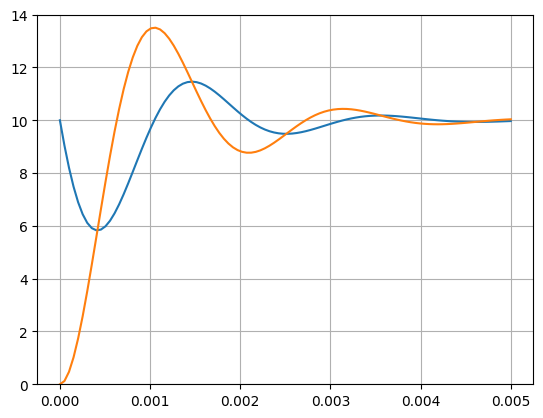

In [11]:
tn=np.linspace(0,.005,100)
plt.plot(tn,van(tn))
plt.plot(tn,vbn(tn))
plt.grid()
plt.ylim(0,14)